#**CSC-105 Assignment 8: Group 1**

#**Introduction:**


Throughout this report we will perform Exploratory Data Analysis on data based on the retail figures of a store. This data includes 48 instances of data collected containing 8 features of information about each instance. These features are the date, the product ID, the product name, the category of the product, the sales price, the cost to the retailer, the quantity of the product sold and the inventory count of the product.

We will perform a variety of tasks to learn and present more information on this dataframe.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/retail_sales_data.csv")
#df = pd.read_csv("/content/drive/sample_data/retail_sales_data.csv"

df.head(20)

,Date,Product_ID,Product_Name,Category,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count
0,2023-01-01,1001,Product A,Electronics,500,350,20,100
1,2023-01-02,1002,Product B,Electronics,600,400,15,80
2,2023-01-03,1003,Product C,Clothing,50,30,50,200
3,2023-01-04,1004,Product D,Clothing,40,25,80,120
4,2023-01-05,1005,Product E,Home Decor,100,70,30,150
5,2023-01-06,1006,Product F,Home Decor,120,80,25,100
6,2023-01-07,1007,Product G,Electronics,450,300,18,90
7,2023-01-08,1008,Product H,Electronics,550,380,22,110
8,2023-01-09,1009,Product I,Clothing,60,35,40,180
9,2023-01-10,1010,Product J,Clothing,45,28,70,100


In [ ]:
df.shape

(48, 8)

# **Task 2**

The data is already clean, containing no missing values

<hr>

# **Task 3**
<p>Calculate the total sales revenue for each product category</p>

In [ ]:


df["Sales_Revenue"] = df["Sales_Price"] * df["Quantity_Sold"]

revenue_by_category = df.groupby(["Category"])[["Sales_Revenue"]].sum().reset_index()
revenue_by_category

,Category,Sales_Revenue
0,Clothing,47918
1,Electronics,174310
2,Home Decor,60470


<hr>

# **Task 4**
<p>Create a bar chart to visualize the total sales revenue for each product category for the entire period.</p>

<function matplotlib.pyplot.show(close=None, block=None)>

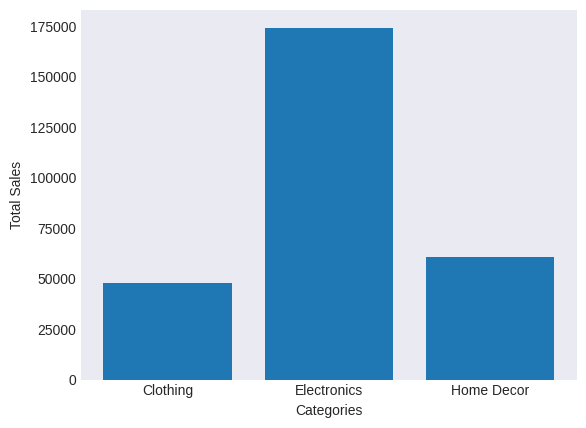

In [ ]:
plt.bar(revenue_by_category["Category"], revenue_by_category["Sales_Revenue"])

plt.xlabel("Categories")
plt.ylabel("Total Sales")

plt.show

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

monthly_revenue = df['Sales_Revenue'].resample('M').sum()

monthly_revenue

Date
2023-01-31    63940
2023-02-28    68914
2023-03-31    70906
2023-04-30    78938
Freq: M, Name: Sales_Revenue, dtype: int64

In [ ]:
df.groupby


<bound method DataFrame.groupby of             Product_ID Product_Name     Category  Sales_Price  Cost_Price  \
Date                                                                        
2023-01-01        1001    Product A  Electronics          500         350   
2023-01-02        1002    Product B  Electronics          600         400   
2023-01-03        1003    Product C     Clothing           50          30   
2023-01-04        1004    Product D     Clothing           40          25   
2023-01-05        1005    Product E   Home Decor          100          70   
2023-01-06        1006    Product F   Home Decor          120          80   
2023-01-07        1007    Product G  Electronics          450         300   
2023-01-08        1008    Product H  Electronics          550         380   
2023-01-09        1009    Product I     Clothing           60          35   
2023-01-10        1010    Product J     Clothing           45          28   
2023-01-11        1011    Product K   Hom

# **Task 5**
<p> Identify the top 5 best-selling products based on the quantity sold.</p>

In [ ]:
Five = df["Quantity_Sold"].nlargest(n=5)
print (Five)

Date
2023-01-04    80
2023-02-04    78
2023-03-04    75
2023-02-10    72
2023-04-04    72
Name: Quantity_Sold, dtype: int64


| Product 3 | Product 15 | Product 27 | Product 21 | Product 39 |
|-----------|------------|------------|------------|------------|
| 80 sold | 78 sold | 75 sold | 72 sold | 72 sold|

# **Task 6**

```
# This is formatted as code
```



In [ ]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

In [ ]:
df['Month'] = df['Month'].astype(str)
df = df.sort_values(by='Month')

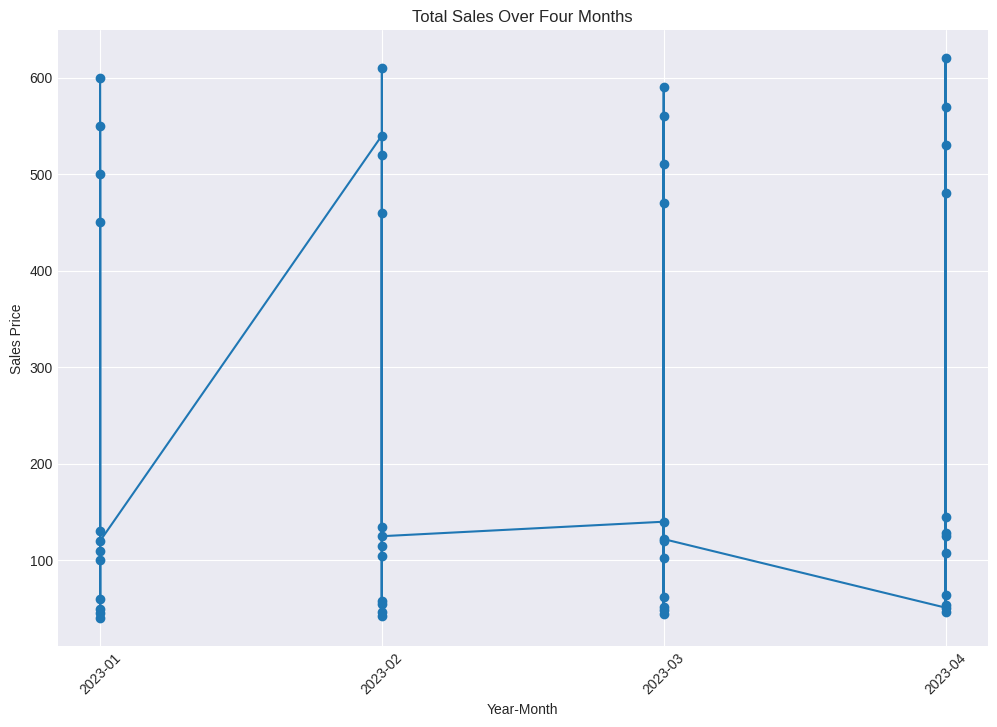

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df['Month'], df['Sales_Price'], marker='o', linestyle='-')

plt.title('Total Sales Over Four Months')
plt.xlabel('Year-Month')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Task 7

In [ ]:
df['Profit'] = (df['Sales_Price'] - df['Cost_Price']) * df['Quantity_Sold']

In [ ]:
product_profit = df.groupby('Product_ID')['Profit'].sum().reset_index()
highest_profit_product = product_profit[product_profit['Profit'] == product_profit['Profit'].max()]

In [ ]:
print("Profit for Each Product:")
print(product_profit)


Profit for Each Product:
    Product_ID  Profit
0         1001   14080
1         1002   14770
2         1003    4802
3         1004    5463
4         1005    4406
5         1006    5104
6         1007   11750
7         1008   17000
8         1009    4481
9         1010    5504
10        1011    6275
11        1012    5845


In [ ]:
print("Product with the Highest Profit:")
print(highest_profit_product)

Product with the Highest Profit:
   Product_ID  Profit
7        1008   17000


### Task 8

Text(0.5, 1.0, 'Histogram of Sales Prices')

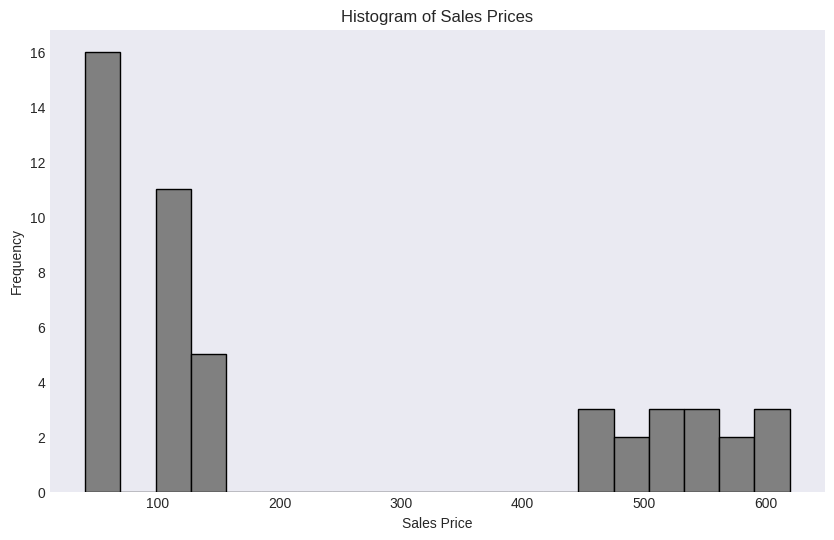

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales_Price'], bins=20, color='grey', edgecolor='black')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Prices')

###Task 9:


Sales_Revenue   2023-04-08
dtype: datetime64[ns]
Sales_Revenue   2023-02-09
dtype: datetime64[ns]


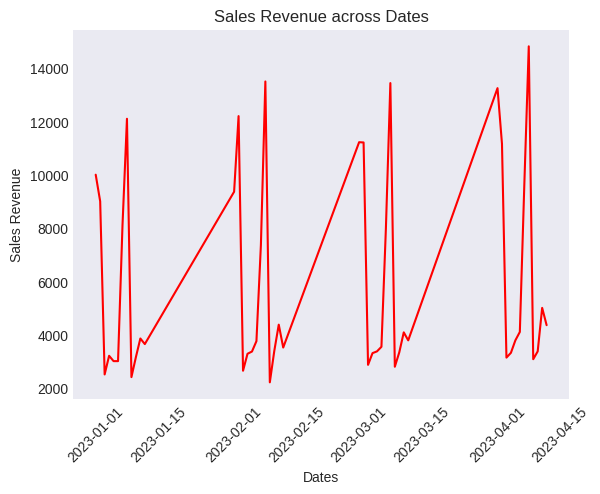

In [ ]:
days = df.groupby(["Date"])[["Sales_Revenue"]].sum()

print(days.idxmax())
print(days.idxmin())

plt.plot(days.index.values, days['Sales_Revenue'] , color="r")


plt.title("Sales Revenue across Dates")
plt.xlabel("Dates")
plt.ylabel("Sales Revenue")

plt.xticks(rotation=45)
plt.show()

In [ ]:
days

,Sales_Revenue
Date,
2023-01-01,10000
2023-01-02,9000
2023-01-03,2500
2023-01-04,3200
2023-01-05,3000
2023-01-06,3000
2023-01-07,8100
2023-01-08,12100
2023-01-09,2400


###Task 10

In [ ]:
days["Date"]=list(days.index.values)

days["Date"] = pd.to_datetime(days["Date"])

days["month"] = days["Date"].dt.month_name()

days

,Sales_Revenue,Date,month
Date,,,
2023-01-01,10000,2023-01-01,January
2023-01-02,9000,2023-01-02,January
2023-01-03,2500,2023-01-03,January
2023-01-04,3200,2023-01-04,January
2023-01-05,3000,2023-01-05,January
2023-01-06,3000,2023-01-06,January
2023-01-07,8100,2023-01-07,January
2023-01-08,12100,2023-01-08,January
2023-01-09,2400,2023-01-09,January


In [ ]:
months = days.groupby(["month"])[["Sales_Revenue"]].sum()

months

,Sales_Revenue
month,
April,78938
February,68914
January,63940
March,70906


In [ ]:
print(months.idxmax())
print(months.idxmin())

Sales_Revenue    April
dtype: object
Sales_Revenue    January
dtype: object


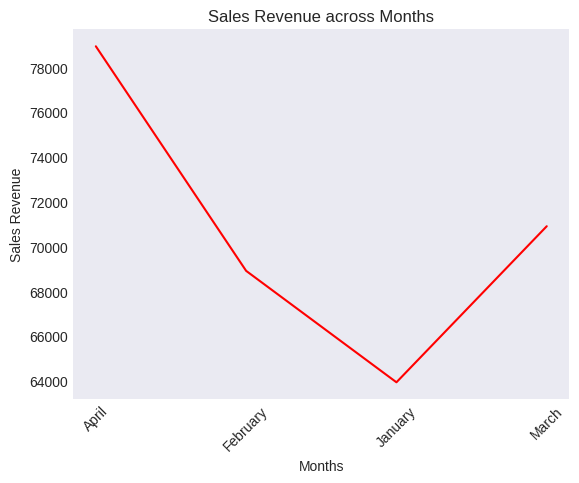

In [ ]:
plt.plot(months.index.values, months['Sales_Revenue'] , color="r")


plt.title("Sales Revenue across Months")
plt.xlabel("Months")
plt.ylabel("Sales Revenue")

plt.xticks(rotation=45)
plt.show()

### **Task 11**

Compute the average sales price for each product category and create a bar chart to visualize it.

In [ ]:
df_averages = df.groupby(['Category'])['Sales_Price'].mean().reset_index()
df_averages

,Category,Sales_Price
0,Clothing,51.1875
1,Electronics,535.0000
2,Home Decor,120.6250


From this table shown above, we can see the average sales price is far greater for electronics than for home decour or clothing, with home decour having, on average, over twice the sales price of electronics.

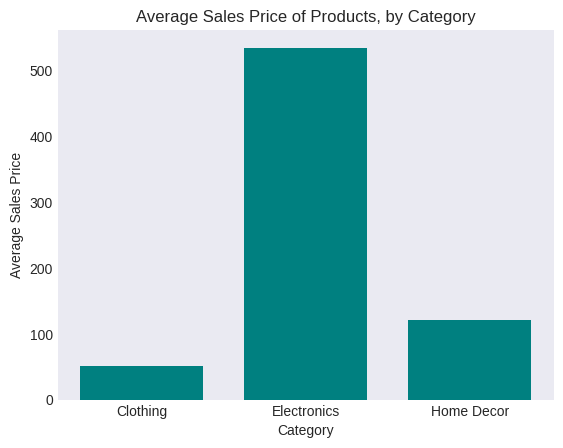

In [ ]:
plt.bar(df_averages['Category'], df_averages['Sales_Price'], color="teal", width=0.75, linewidth=0)

plt.title("Average Sales Price of Products, by Category")
plt.xlabel("Category")
plt.ylabel("Average Sales Price")

plt.show()

From this bar chart, we can see the data in the table shown clearly. Electronics has over ten times the average sales price of clothing, and over four times the average sales price as home decour.

# **Task 12**

Conduct a correlation analysis to investigate the relationship between sales price and quantity sold.

Before calculating the correlation coefficient, the data points will be plotted on a graph.

<ipython-input-184-47f95b0771e5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


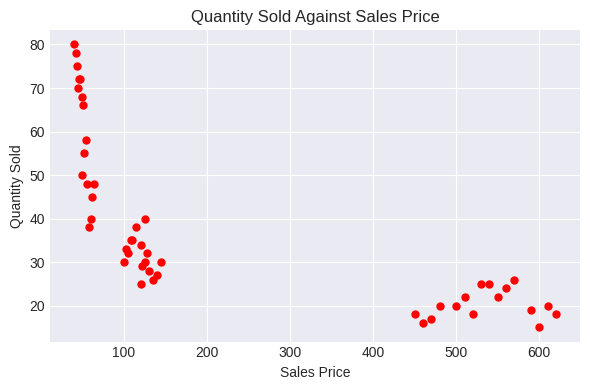

In [ ]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(6, 4))

plt.plot(df['Sales_Price'], df['Quantity_Sold'], color="r", linestyle = 'none', marker="o", markersize=5)

plt.title("Quantity Sold Against Sales Price")
plt.ylabel("Quantity Sold")
plt.xlabel("Sales Price")

plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()

From the data points above it can be seen that as the sales price is increased, the quantity sold tends to decrease. Therefore, we would expect a negative correlation coefficient.

However, this decrease doesn't look linear, with a very sharp decrease in quantity sold with an increase in sales price initially and a very shallow gradient with high sales prices. There is also a lot of spread within clusters of data points, with some products having both higher quantities sold and sales prices than their neighbours. These observations would imply that the correlation coefficient should be between, but not particularly close to, 0 and -1.

In [ ]:
correlation_coefficient = df['Sales_Price'].corr(df['Quantity_Sold'])
print(f"The correlation coefficient between Sales Prices and Quantity Sold is {correlation_coefficient}")

The correlation coefficient between Sales Prices and Quantity Sold is -0.7165887795962937


This fits with the intuitive predictions to the correlation coefficient made from observing the data.

The negative value means that, as observed, increasing the Sales Price generally lowered the Quantity Sold for a product.

The magnitute of 0.71 means that the relationship is not a perfect fit for a linear relationship and there is some variation between products Sales Prices and their Quantity Sold. However, it is not close to zero in the context of the range and provides evidence for the people selling the products that increasing the price of a product will tend to decrease the quantity sold.

#**Summary**

Through our explanatory analysis of the dataframe, we have discovered many important statistics that the retailers would be interested by. Some of the key findings are as follows. Electronics were the category of product that by far provided the most sales revenue, more than at $174,310, more than the sum of home decor and clothing.

The product with the highest profit was the product with the ID 1008, with a profit of $17000.

The frequency of sales of products against the price of products was shown in a histogram. This shows that for cheaper products, higher frequencies are shown. This contrasts more expensive products for which much smaller quantities are sold.

Next, the sales revenue was shown against the date. A clear repeating pattern can be seen. This could be shown to correspond to weekdays, with the pattern therefore occuring due to popular shopping times. The sales revenue against date can be seen to gradually increase before dipping to a minimum, spiking to a maximum, then dropping and repeating the pattern. This information could be useful to retailers to see popular shopping times.

The pattern of sales revenue against months was then shown. The sales revenue can be seen to be the lowest in January, increasing through the months until April, when it peaks at $78938.

Then the relationship between sales price, quantity sold and category was examined. Electronics was shown to be by far the highest sales price per item between the categories. There was also a negative correlation found between the quantity sold and the sales price of an item, which makes intuitive sense. This can be used by retailers when considering how much to sell particular items for.

